<h4 align="center"> G8_Project Proposal_IST5520</h4>

<h1 align="center"> Missouri Traffic Accident Data</h1>
<h2 align="center"> Descriptive & Predictive Analysis on different factors influencing road accidents </h2>
<h3 align="center"> Group Members: Dennis Baleta, Sai Rachana Bandi, Austin Kovis, Debasis Roy, Apurv Saxena </h3>

## 1. Introduction:
US-Accidents can be used for numerous applications such as real-time accident prediction, studying accident hotspot locations, casualty analysis and extracting cause and effect rules to predict accidents, and studying the impact of precipitation or other environmental stimuli on accident occurrence. This data has been collected in real-time, using multiple Traffic APIs. Currently, it contains data that is collected from February 2016 to December 2019 for the Contiguous United States.

This is a countrywide traffic accident dataset, which covers 49 states of the United States from which we are taking 3 states into consideration. The data is collected from February 2016 to December 2019, using several data providers, including two APIs that provide streaming traffic incident data. These APIs broadcast traffic data captured by a variety of entities, such as the US and state departments of transportation, law enforcement agencies, traffic cameras, and traffic sensors within the road-networks. Currently, there are about 3.0 million accident records in this dataset.

Most of the accidents take place due to bad weather conditions (like heavy fog, rain, sleet, wind), traffic, because of drivers mood variations and so on.

Our study will focus on Weather_Condition factor, Temperature factor, Visibility factor, Wind_Speed factor, Wind_Direction factor and all other weather related factors. Also Severity factor, factors related to the place where the accident has occurred. Using this data we will create a model which would predict the list of accident prone areas for the next day based on the weather conditions, which would help the department of transportation and police to take necessary precautions to avoid accidents from occuring or to take immediate action if required.

In this project, we want to conduct an exploratory study on the road accidents and factors inﬂuencing it. Speciﬁcally, we want to answer the following research questions:
1. What are the predicting variables actually aﬀecting the road accidents?
2. How does weather conditions impact road accidents?
3. What are factors of the accident and how it could be mapped with severity?


## 2. Data
The dataset is collected from the below link

https://www.kaggle.com/sobhanmoosavi/us-accidents

The dataset will be filtered to contain the data of three states. This is due to the size of the original dataset being too large to feasibly manipulate. The three states the new dataset will be based on will be Missouri (MO), California (CA), and Maryland (MD). This will pull data from the west coast, midwest, and the east coast of the United States.

The final dataset will consist of 49 columns. Below is the description and details.

In [161]:
# Import Modules
import pandas as pd

In [162]:
#Read in the data
dat = pd.read_csv("MO_Accidents.csv")

In [163]:
#Above shows us the data types of each variable included within the study.
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7666 entries, 0 to 7665
Data columns (total 49 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     7666 non-null   object 
 1   Source                 7666 non-null   object 
 2   TMC                    7666 non-null   int64  
 3   Severity               7666 non-null   int64  
 4   Start_Time             7666 non-null   object 
 5   End_Time               7666 non-null   object 
 6   Start_Lat              7666 non-null   float64
 7   Start_Lng              7666 non-null   float64
 8   End_Lat                0 non-null      float64
 9   End_Lng                0 non-null      float64
 10  Distance(mi)           7666 non-null   float64
 11  Description            7666 non-null   object 
 12  Number                 1088 non-null   float64
 13  Street                 7666 non-null   object 
 14  Side                   7666 non-null   object 
 15  City

In [164]:
#Visualizes the data in a readable format
dat.head(1).transpose()

,0
ID,A-167306
Source,MapQuest
TMC,201
Severity,3
Start_Time,11/30/2016 17:32
End_Time,11/30/2016 18:02
Start_Lat,38.65
Start_Lng,-90.4486
End_Lat,NaN
End_Lng,NaN


In [165]:
#Apply() allows us to see what variables include NULL values and how many NULL values are there.
dat.apply(lambda x: sum(x.isnull()), axis=0)

ID                          0
Source                      0
TMC                         0
Severity                    0
Start_Time                  0
End_Time                    0
Start_Lat                   0
Start_Lng                   0
End_Lat                  7666
End_Lng                  7666
Distance(mi)                0
Description                 0
Number                   6578
Street                      0
Side                        0
City                        0
County                      0
State                       0
Zipcode                     0
Country                     0
Timezone                    0
Airport_Code                1
Weather_Timestamp          54
Temperature(F)             66
Wind_Chill(F)            1748
Humidity(%)                69
Pressure(in)               66
Visibility(mi)             71
Wind_Direction             89
Wind_Speed(mph)           277
Precipitation(in)        1855
Weather_Condition          72
Amenity                     0
Bump      

In [166]:
#Summary of the statistics
dat.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
TMC,7666.0,209.557396,25.158507,201.000000,201.000000,201.000000,201.000000,406.000000
Severity,7666.0,2.711584,0.483425,1.000000,2.000000,3.000000,3.000000,4.000000
Start_Lat,7666.0,38.646983,0.429148,36.089977,38.562069,38.672737,38.803123,40.466331
Start_Lng,7666.0,-91.483290,1.744734,-95.480331,-93.277824,-90.449280,-90.339684,-89.533127
End_Lat,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
End_Lng,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Distance(mi),7666.0,0.114018,0.648372,0.000000,0.000000,0.000000,0.000000,13.820000
Number,1088.0,4497.553309,4097.305301,1.000000,1236.000000,3300.000000,6402.750000,24499.000000
Temperature(F),7600.0,61.061039,19.066254,-0.900000,48.000000,64.000000,76.000000,102.900000
Wind_Chill(F),5918.0,57.080331,22.544401,-13.800000,39.000000,62.000000,75.000000,96.000000


### Key Information in The Dataset


SlNo. Attribute: Description
1. ID: This is a unique identifier of the accident record.
2. Source: Indicates source of the accident report (i.e. the API which reported the accident.).
3. TMC: A traffic accident may have a Traffic Message Channel (TMC) code which provides a more detailed description of the event.
4. Severity: Shows the severity of the accident, a number between 1 and 4, where 1 indicates the least impact on traffic (i.e., short delay as a result of the accident) and 4 indicates a significant impact on traffic (i.e., long delay).
5. Start_Time: Shows start time of the accident in the local time zone.
6. End_Time: Shows end time of the accident in the local time zone.
7. Start_Lat: Shows latitude in GPS coordinate of the start point.
8. Start_Lng: Shows longitude in GPS coordinate of the start point.
9. End_Lat: Shows latitude in GPS coordinate of the end point.
10. End_Lng: Shows longitude in GPS coordinate of the end point.
11. Distance(mi): The length of the road extent affected by the accident.
12. Description: Shows natural language description of the accident.
13. Number: Shows the street number in the address field.
14. Street: Shows the street name in the address field.
15. Side: Shows the relative side of the street (Right/Left) in the address field.
16. City: Shows the city in the address field.
17. County: Shows the county in the address field.
18. State: Shows the state in the address field.
19. Zip Code: Shows the zip code in the address field.
20. Country: Shows the country in the address field.
21. Timezone: Shows timezone based on the location of the accident (eastern, central, etc.).
22. Airport_Code: Denotes an airport-based weather station which is the closest one to the location of the accident.
23. Weather_Timestamp: Shows the time-stamp of weather observation record (in local time).
24. Temperature(F): Shows the temperature (in Fahrenheit).
25. Wind_Chill(F): Shows the wind chill (in Fahrenheit).
26. Humidity(%): Shows the humidity (in percentage).
27. Pressure(in): Shows the air pressure (in inches).
28. Visibility(mi): Shows visibility (in miles).
29. Wind_Direction: Shows wind direction.
30. Wind_Speed(mph): Shows wind speed (in miles per hour).
31. Precipitation(in): Shows precipitation amount in inches, if there is any.
32. Weather_Condition: Shows the weather condition (rain, snow, thunderstorm, fog, etc.)
33. Amenity: A POI annotation which indicates the presence of amenity in a nearby location.
34. Bump: A POI annotation which indicates presence of speed bump or hump in a nearby location.
35. Crossing: A POI annotation which indicates the presence of crossing in a nearby location.
36. Give_Way: A POI annotation which indicates the presence of a give_way in a nearby location.
37. Junction: A POI annotation which indicates the presence of a junction in a nearby location.
38. No_Exit: A POI annotation which indicates the presence of no_exit in a nearby location.
39. Railway: A POI annotation which indicates the presence of railway in a nearby location.
40. Roundabout: A POI annotation which indicates the presence of roundabout in a nearby location.
41. Station: A POI annotation which indicates the presence of a station in a nearby location.
42. Stop: A POI annotation which indicates the presence of a stop in a nearby location.
43. Traffic_Calming: A POI annotation which indicates the presence of traffic_calming in a nearby location.
44. Traffic_Signal: A POI annotation which indicates the presence of traffic_signal in a nearby location.
45. Turning_Loop: A POI annotation which indicates the presence of a turning_loop in a nearby location.
46. Sunrise_Sunset: Shows the period of day (i.e. day or night) based on sunrise/sunset.
47. Civil_Twilight: Shows the period of day (i.e. day or night) based on civil twilight.
48. Nautical_Twilight: Shows the period of day (i.e. day or night) based on nautical twilight.
49. Astronomical_Twilight: Shows the period of day (i.e. day or night) based on astronomical twilight.



## 3. Timeline

    Sl. No       Tasks                           Activity                                     Start/Complete Date
      1      Data Exploration             Explore dataset                                     02/20-03/01
      
      2      Data Analysis I              Data Remodeling, Data Manipulation                  03/02-03/16
      
      3      Data Analysis II             Create Visualizations, Gather Insights              03/17-03/31
      
      4      Predictive Analysis          Work on the Machine Learning part of the project    04/01-04/14
      
      5      Presentation Preparation     List the important topics that will need to be 
                                          covered during the presentation, assign slides to 
                                          team members, Final check of the slides before 
                                          the presentation                                    04/15-04/21
                                          
      6      Write Report                 Gather requirements for the report, assign 
                                          sections within the report to team members, 
                                          finalize the report                                 04/22-05/05
                                          
      7      Presentation                 Project Presentation                                   05/06


In [167]:
# Get the summary statistics
dat.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
TMC,7666.0,209.557396,25.158507,201.000000,201.000000,201.000000,201.000000,406.000000
Severity,7666.0,2.711584,0.483425,1.000000,2.000000,3.000000,3.000000,4.000000
Start_Lat,7666.0,38.646983,0.429148,36.089977,38.562069,38.672737,38.803123,40.466331
Start_Lng,7666.0,-91.483290,1.744734,-95.480331,-93.277824,-90.449280,-90.339684,-89.533127
End_Lat,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
End_Lng,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Distance(mi),7666.0,0.114018,0.648372,0.000000,0.000000,0.000000,0.000000,13.820000
Number,1088.0,4497.553309,4097.305301,1.000000,1236.000000,3300.000000,6402.750000,24499.000000
Temperature(F),7600.0,61.061039,19.066254,-0.900000,48.000000,64.000000,76.000000,102.900000
Wind_Chill(F),5918.0,57.080331,22.544401,-13.800000,39.000000,62.000000,75.000000,96.000000


We see that 'End_Lat' and 'End_Lng' columns are empty. Thus removing these columns is better as they are of no use.

In [168]:
dat = dat.drop(['End_Lat', 'End_Lng'], axis=1)
dat = dat.drop(['Astronomical_Twilight', 'Nautical_Twilight', 'Civil_Twilight', 'Roundabout', 'Bump', 'Weather_Timestamp', 'Airport_Code', 'Timezone', 'Country', 'Number','State'], axis=1)
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7666 entries, 0 to 7665
Data columns (total 36 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 7666 non-null   object 
 1   Source             7666 non-null   object 
 2   TMC                7666 non-null   int64  
 3   Severity           7666 non-null   int64  
 4   Start_Time         7666 non-null   object 
 5   End_Time           7666 non-null   object 
 6   Start_Lat          7666 non-null   float64
 7   Start_Lng          7666 non-null   float64
 8   Distance(mi)       7666 non-null   float64
 9   Description        7666 non-null   object 
 10  Street             7666 non-null   object 
 11  Side               7666 non-null   object 
 12  City               7666 non-null   object 
 13  County             7666 non-null   object 
 14  Zipcode            7666 non-null   object 
 15  Temperature(F)     7600 non-null   float64
 16  Wind_Chill(F)      5918 

In [169]:
# removing null values
dat =dat.dropna(axis=0)
dat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5420 entries, 20 to 7664
Data columns (total 36 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 5420 non-null   object 
 1   Source             5420 non-null   object 
 2   TMC                5420 non-null   int64  
 3   Severity           5420 non-null   int64  
 4   Start_Time         5420 non-null   object 
 5   End_Time           5420 non-null   object 
 6   Start_Lat          5420 non-null   float64
 7   Start_Lng          5420 non-null   float64
 8   Distance(mi)       5420 non-null   float64
 9   Description        5420 non-null   object 
 10  Street             5420 non-null   object 
 11  Side               5420 non-null   object 
 12  City               5420 non-null   object 
 13  County             5420 non-null   object 
 14  Zipcode            5420 non-null   object 
 15  Temperature(F)     5420 non-null   float64
 16  Wind_Chill(F)      5420

## 4. Data Exploration

### 4.1. Data Transformation

We notice that the Start_Time and End_Time columns are represented as strings. It's better to represent them as datetime objects. Let's transform them by calling the to_datetime() function in the pandas module.

In [170]:
dat['Start_Time'] = pd.to_datetime(dat['Start_Time'])
dat['End_Time'] = pd.to_datetime(dat['End_Time'])

In [171]:
# Describe the Start_Time column
dat['Start_Time'].describe()

count                    5420
unique                   5289
top       2019-12-16 05:30:00
freq                        3
first     2016-11-22 21:55:00
last      2019-12-31 21:41:00
Name: Start_Time, dtype: object

In [172]:
# Describe the End_Time column
dat['End_Time'].describe()

count                    5420
unique                   5173
top       2019-04-30 19:22:00
freq                        6
first     2016-11-22 22:24:00
last      2019-12-31 22:56:00
Name: End_Time, dtype: object

In many cases, we may need to know the year, month, day of week information of the accident. These columns may be helpful in visualizing the data as well as regression or predicitive analyses. Let's create seperate variables.

In [173]:
# Create Start_Year column
dat['Start_Year'] = dat['Start_Time'].dt.year
# Create Start_Month column
dat['Start_Month'] = dat['Start_Time'].dt.month
# Create Start_Dayofweek column (0=Mon, 6=Sun)
dat['Start_Dayofweek'] = dat['Start_Time'].dt.dayofweek
# Create Start_Hour column
dat['Start_Hour']= dat['Start_Time'].dt.hour

In [174]:
# Replace Boolean values with numbers
dat.replace([True, False], [1, 0], inplace=True)

In [175]:
dat['Amenity'].unique()

array([0, 1], dtype=int64)

In [176]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5420 entries, 20 to 7664
Data columns (total 40 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   ID                 5420 non-null   object        
 1   Source             5420 non-null   object        
 2   TMC                5420 non-null   int64         
 3   Severity           5420 non-null   int64         
 4   Start_Time         5420 non-null   datetime64[ns]
 5   End_Time           5420 non-null   datetime64[ns]
 6   Start_Lat          5420 non-null   float64       
 7   Start_Lng          5420 non-null   float64       
 8   Distance(mi)       5420 non-null   float64       
 9   Description        5420 non-null   object        
 10  Street             5420 non-null   object        
 11  Side               5420 non-null   object        
 12  City               5420 non-null   object        
 13  County             5420 non-null   object        
 14  Zipcode

### Data Visualization

In [177]:
# Matplotlib to visualize the data
import matplotlib.pyplot as plt

#Show plot in jupyter notebook
%matplotlib inline

In [178]:
Weather = dat.Weather_Condition.value_counts()

In [179]:
Weather

Fair                            2343
Cloudy                           979
Mostly Cloudy                    669
Light Rain                       401
Partly Cloudy                    341
Light Snow                       131
Rain                              72
Light Rain with Thunder           66
Fog                               60
T-Storm                           38
Haze                              36
Cloudy / Windy                    30
Heavy Rain                        28
Fair / Windy                      28
Snow                              26
Heavy T-Storm                     23
Light Drizzle                     17
Partly Cloudy / Windy             17
Thunder                           16
Overcast                          15
Thunder in the Vicinity           14
Wintry Mix                        13
Mostly Cloudy / Windy             11
Light Snow / Windy                 8
Light Snow and Sleet               5
Thunderstorms and Rain             4
Heavy Snow                         4
L

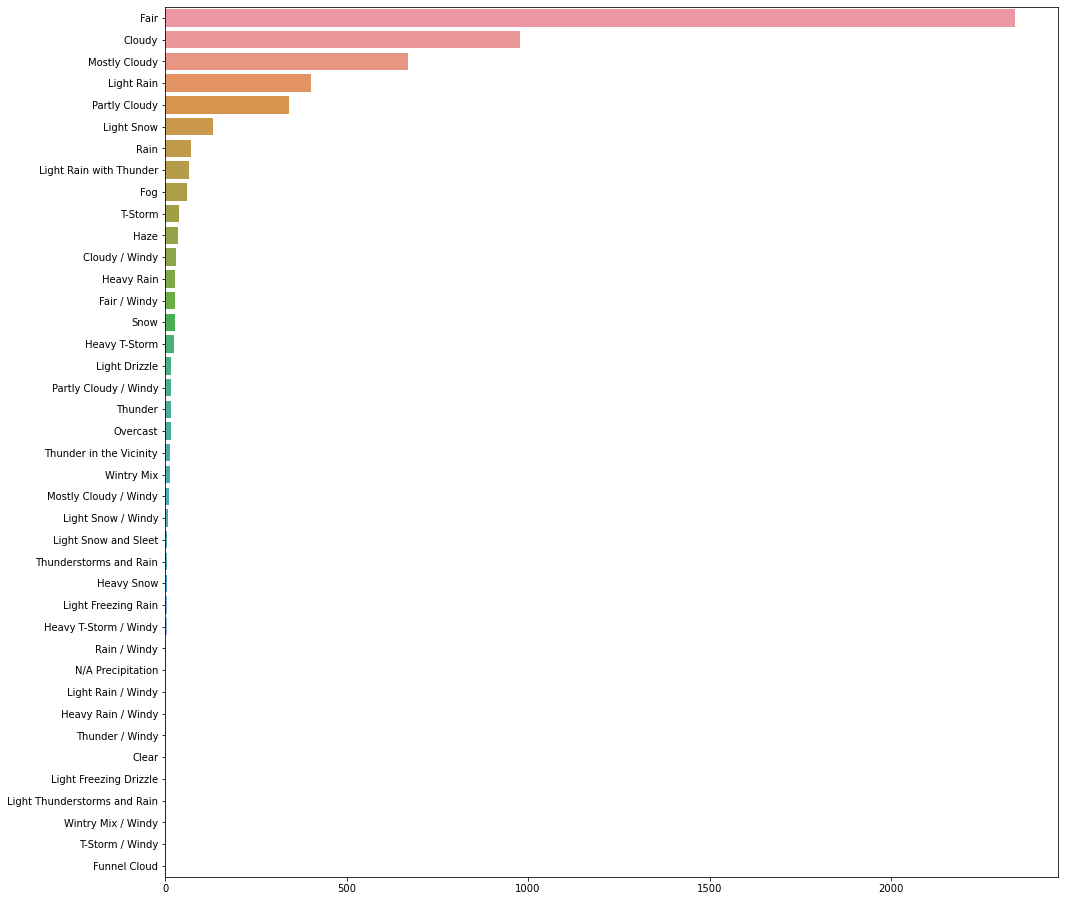

In [180]:
import seaborn as sns
plt.figure(figsize=(16, 16))
sns.barplot(Weather.values, Weather.index)

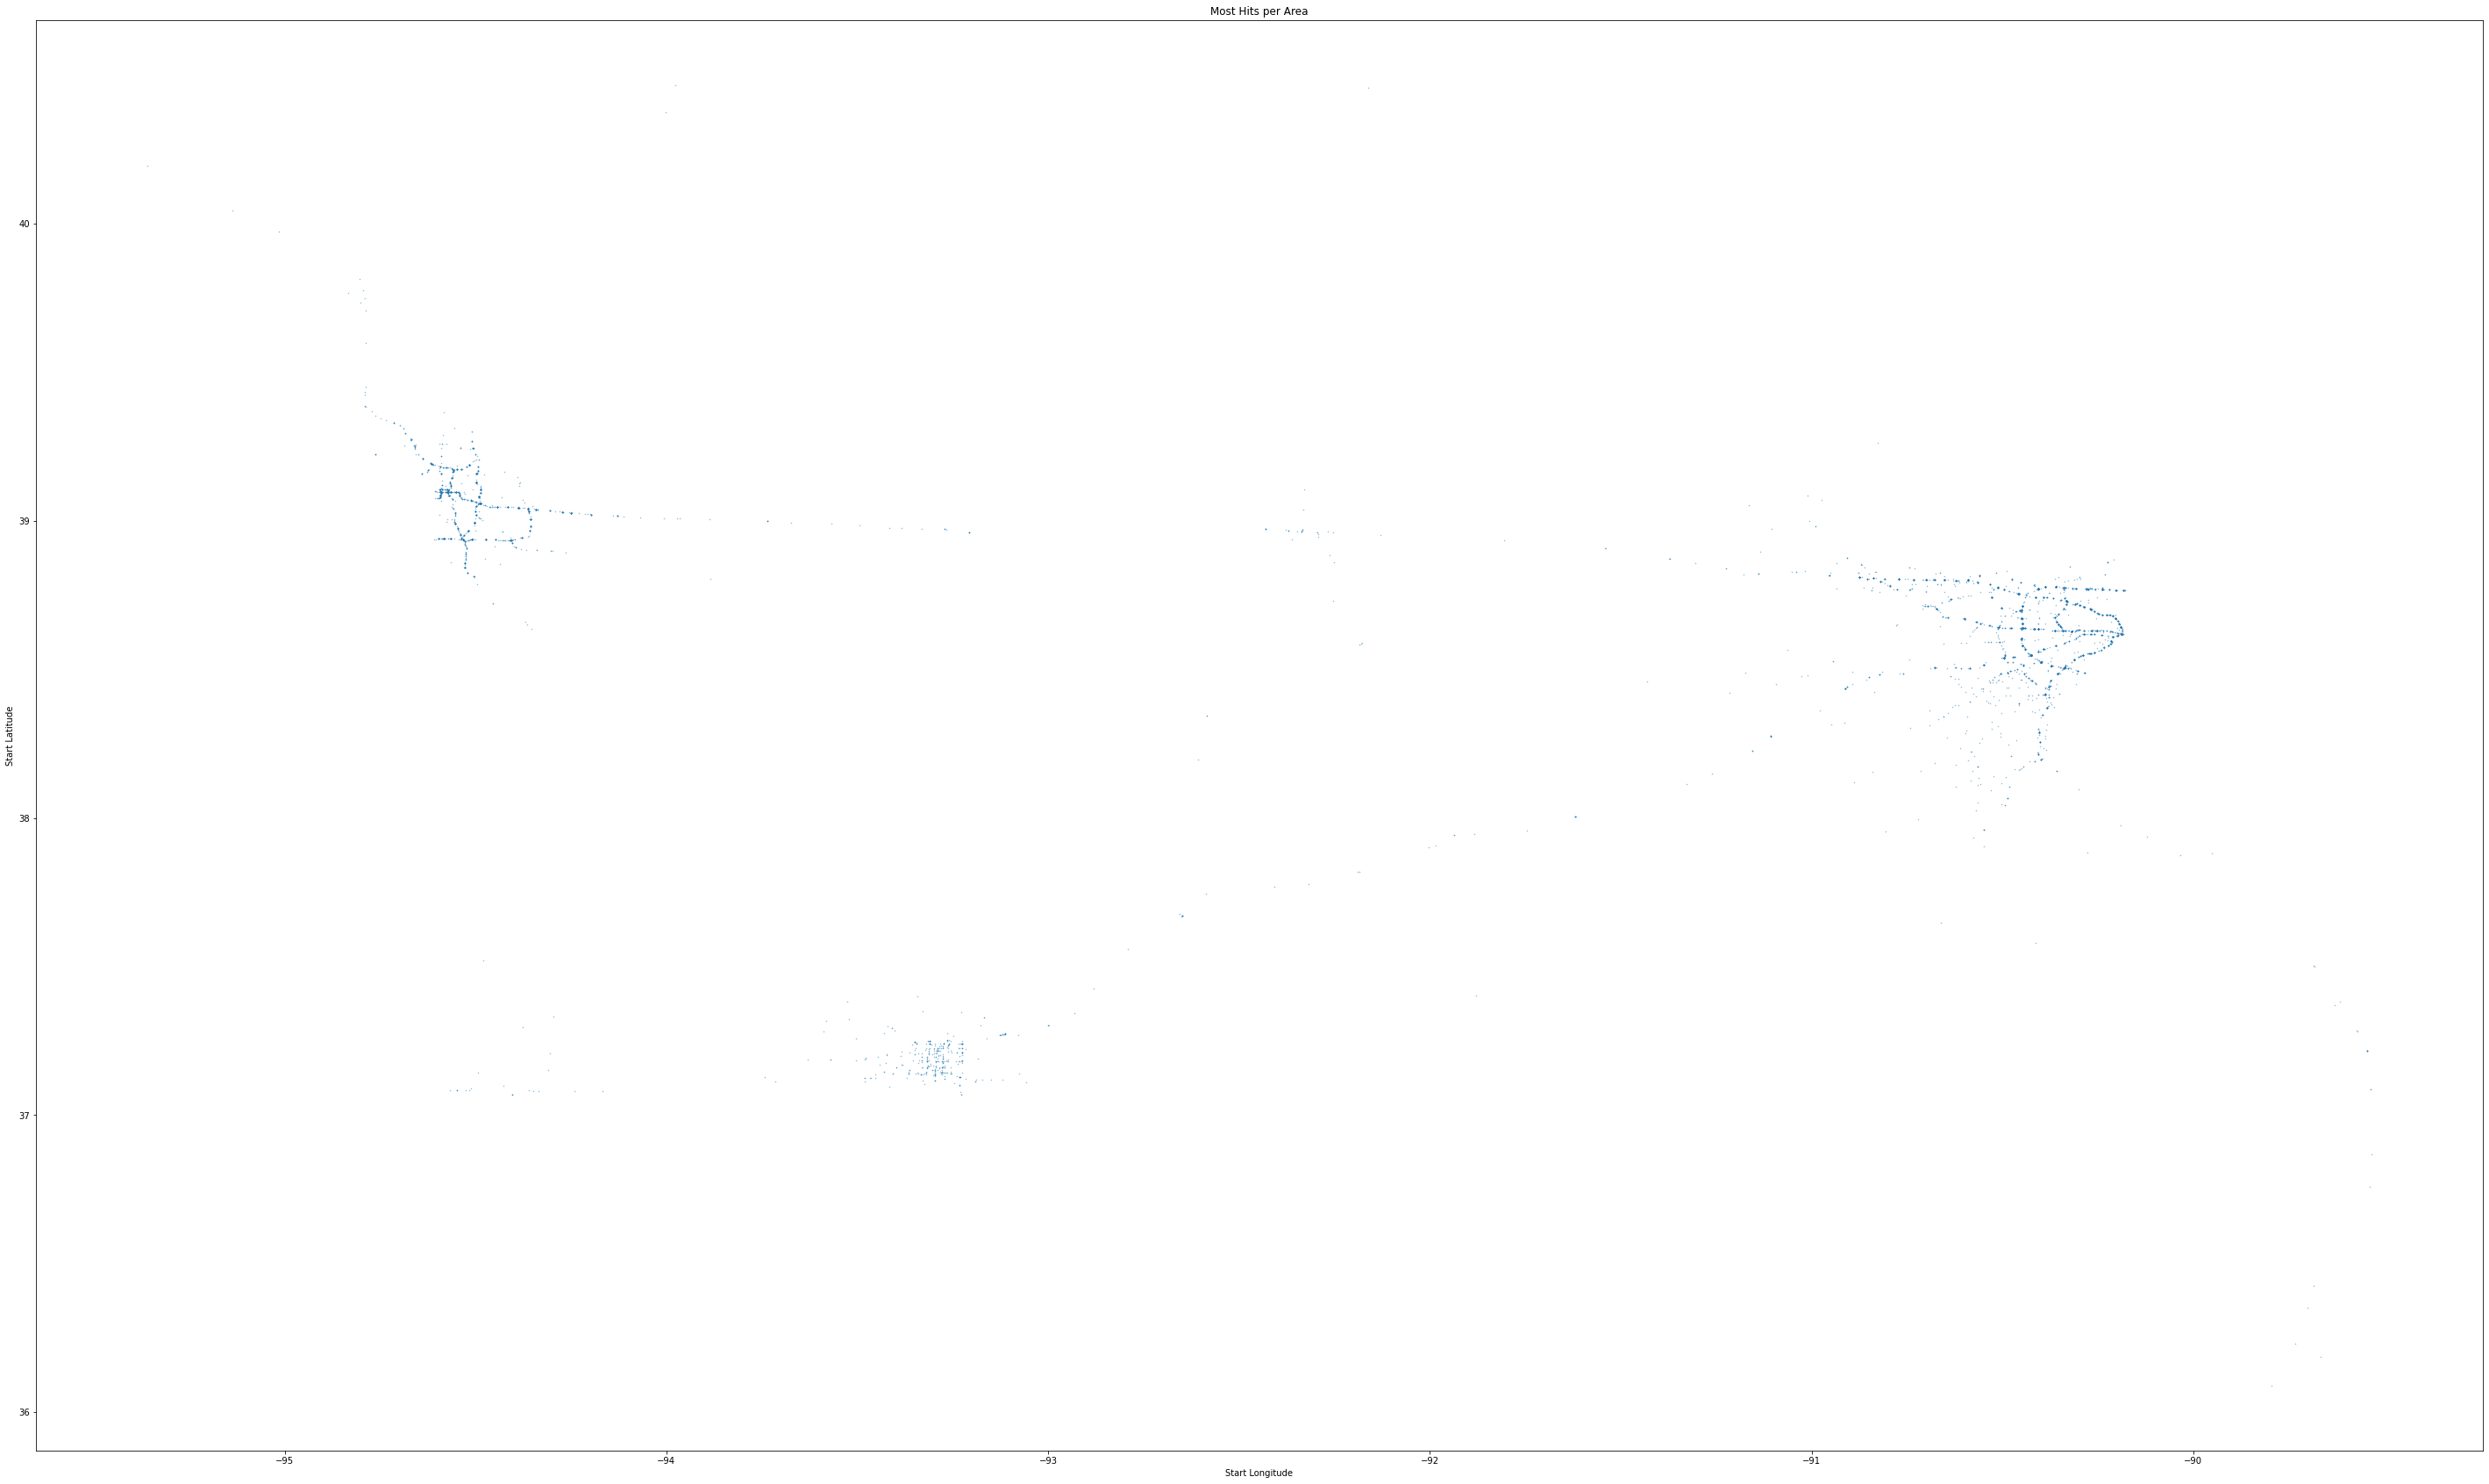

In [181]:
#plotting the Lat against Long could show the map of the area
plt.figure(figsize=(50,30))
plt.title('Most Hits per Area')
plt.xlabel('Start Longitude')
plt.ylabel('Start Latitude')
plt.plot(dat.Start_Lng, dat.Start_Lat, ".", alpha=0.5, ms=1)
plt.show()

In [182]:
severityResult = dat.groupby('Severity').count()
severityResult

,ID,Source,TMC,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Description,Street,...,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Start_Year,Start_Month,Start_Dayofweek,Start_Hour
Severity,,,,,,,,,,,,,,,,,,,,,
2,1904,1904,1904,1904,1904,1904,1904,1904,1904,1904,...,1904,1904,1904,1904,1904,1904,1904,1904,1904,1904
3,3419,3419,3419,3419,3419,3419,3419,3419,3419,3419,...,3419,3419,3419,3419,3419,3419,3419,3419,3419,3419
4,97,97,97,97,97,97,97,97,97,97,...,97,97,97,97,97,97,97,97,97,97


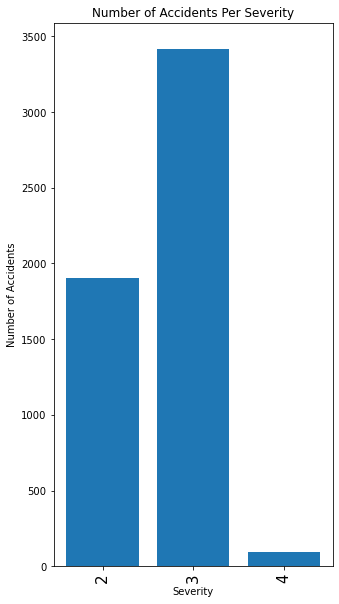

In [183]:
plt.figure(figsize=(5, 10))
plt.title('Number of Accidents Per Severity')
plt.bar(severityResult.index, severityResult.ID)
plt.xlabel('Severity')
plt.ylabel('Number of Accidents')
plt.xticks(severityResult.index, rotation='vertical', size=15)
plt.show()

In [184]:
visibilityResult = dat.groupby('Visibility(mi)').count()
visibilityResult

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Description,...,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Start_Year,Start_Month,Start_Dayofweek,Start_Hour
Visibility(mi),,,,,,,,,,,,,,,,,,,,,
0.00,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
0.20,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
0.25,11,11,11,11,11,11,11,11,11,11,...,11,11,11,11,11,11,11,11,11,11
0.50,33,33,33,33,33,33,33,33,33,33,...,33,33,33,33,33,33,33,33,33,33
0.75,24,24,24,24,24,24,24,24,24,24,...,24,24,24,24,24,24,24,24,24,24
0.80,6,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,6
1.00,89,89,89,89,89,89,89,89,89,89,...,89,89,89,89,89,89,89,89,89,89
1.20,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1.50,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4


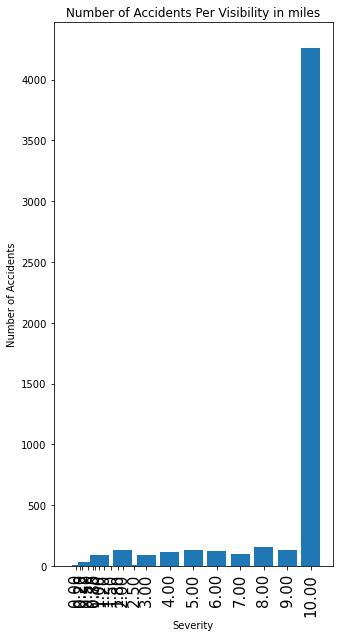

In [185]:
plt.figure(figsize=(5, 10))
plt.title('Number of Accidents Per Visibility in miles')
plt.bar(visibilityResult.index, visibilityResult.ID)
plt.xlabel('Severity')
plt.ylabel('Number of Accidents')
plt.xticks(visibilityResult.index, rotation='vertical', size=15)
plt.show()

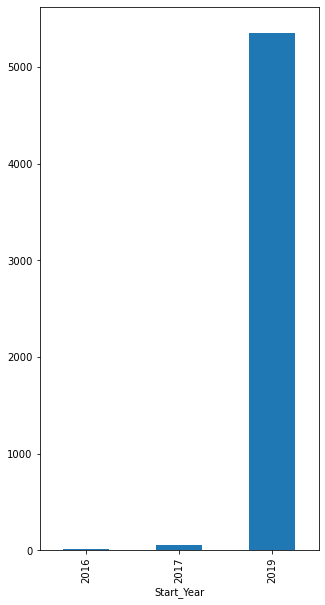

In [186]:
plt.figure(figsize =(5,10))
dat.groupby(['Start_Year']).size().plot.bar()

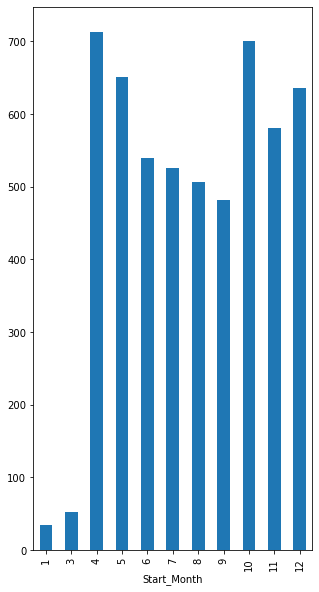

In [187]:
plt.figure(figsize =(5,10))
dat.groupby(['Start_Month']).size().plot.bar()

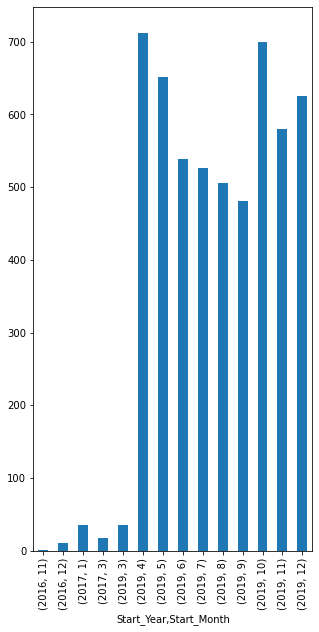

In [188]:
plt.figure(figsize =(5,10))
dat.groupby(['Start_Year','Start_Month']).size().plot.bar()

In [189]:
dat.groupby(['Start_Dayofweek']).size()

Start_Dayofweek
0     988
1    1017
2     933
3     866
4     877
5     377
6     362
dtype: int64

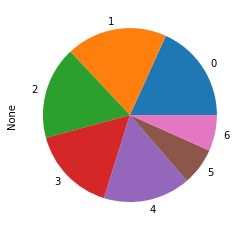

In [190]:
dat.groupby(['Start_Dayofweek']).size().plot.pie()

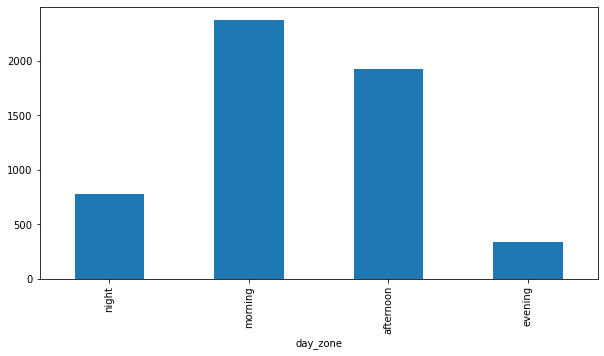

In [191]:
dat['day_zone'] = pd.cut((dat['Start_Hour']),bins=(0,6,12,18,24), labels=["night", "morning", "afternoon", "evening"])
plt.figure(figsize =(10,5))
dat.groupby(['day_zone']).size().plot.bar()

St. Louis County    1965
Jackson             1141
St. Louis City       563
St. Charles          449
Jefferson            351
Greene               344
Clay                 219
Platte                99
Franklin              54
Cass                  30
Boone                 29
Jasper                21
Saline                13
Phelps                12
Warren                11
Lafayette             11
Laclede               10
Scott                  9
Buchanan               7
Lincoln                7
Montgomery             6
St. Francois           6
Webster                6
Cape Girardeau         6
Ste Genevieve          5
Pemiscot               4
Washington             4
Christian              4
Pulaski                4
Miller                 3
Callaway               3
New Madrid             3
Lawrence               3
Holt                   3
Cole                   2
Harrison               2
Crawford               2
Scotland               1
Gasconade              1
Saint Louis            1


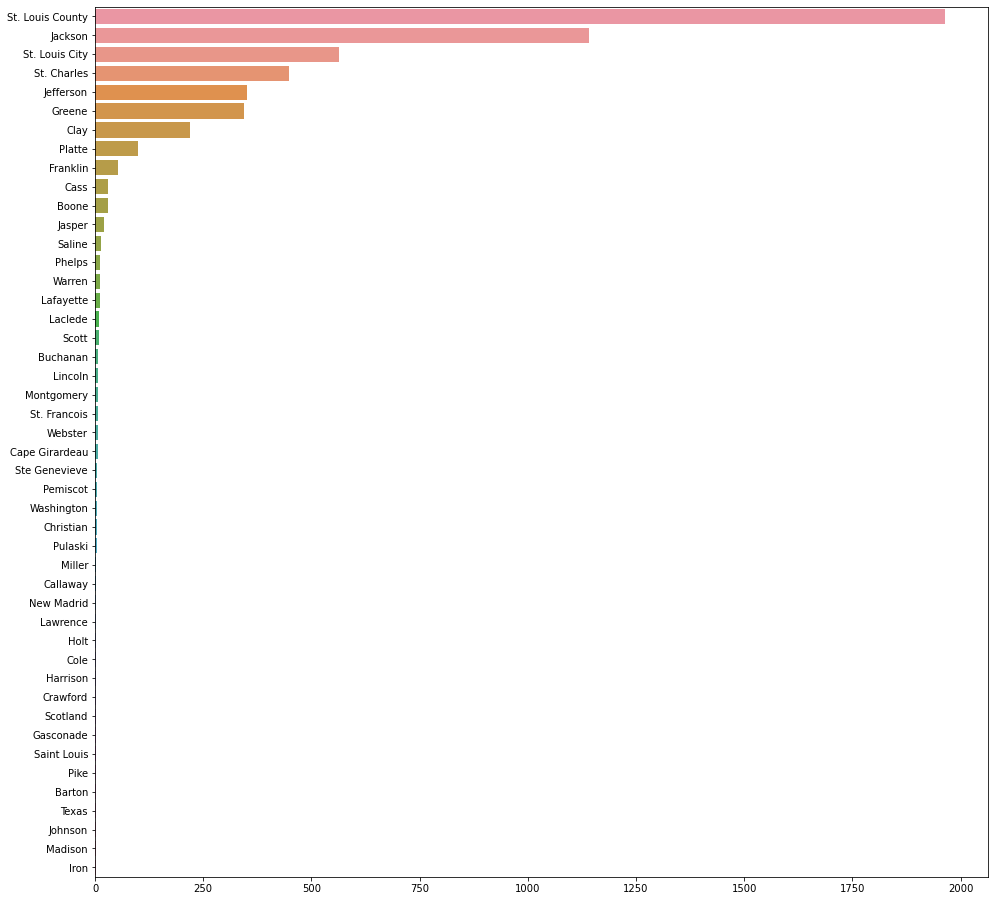

In [196]:
# Accidents per County
County = dat.County.value_counts()
print(County)
plt.figure(figsize=(16, 16))
sns.barplot(County.values, County.index)

S           595
CALM        556
N           418
SSW         382
W           346
SSE         342
E           299
SW          283
WSW         267
NW          266
NNW         257
WNW         256
SE          230
ESE         207
NNE         177
ENE         176
NE          175
VAR         145
North        30
East          9
South         2
Variable      2
Name: Wind_Direction, dtype: int64


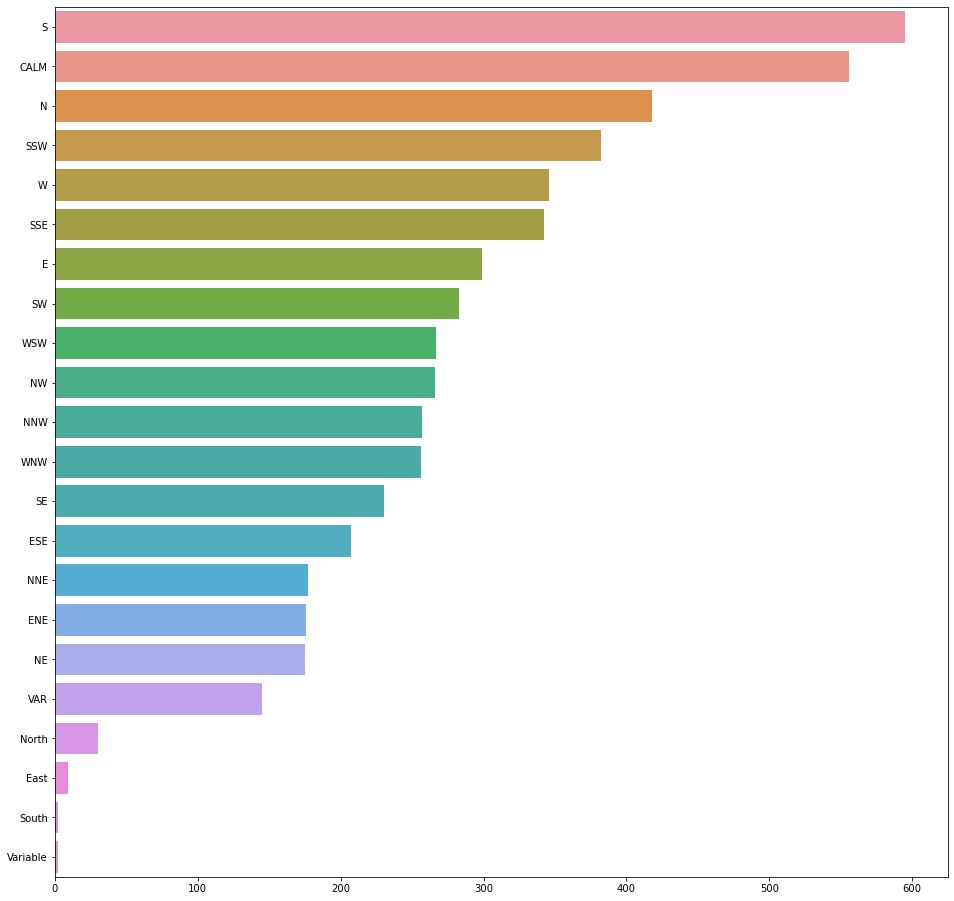

In [197]:
# Accidents per Wind_Direction
Wind_Direction = dat.Wind_Direction.value_counts()
print(Wind_Direction)
plt.figure(figsize=(16, 16))
sns.barplot(Wind_Direction.values, Wind_Direction.index)

72.0    147
70.0    137
73.0    135
76.0    134
74.0    131
       ... 
19.4      1
44.1      1
19.9      1
14.0      1
37.9      1
Name: Temperature(F), Length: 101, dtype: int64


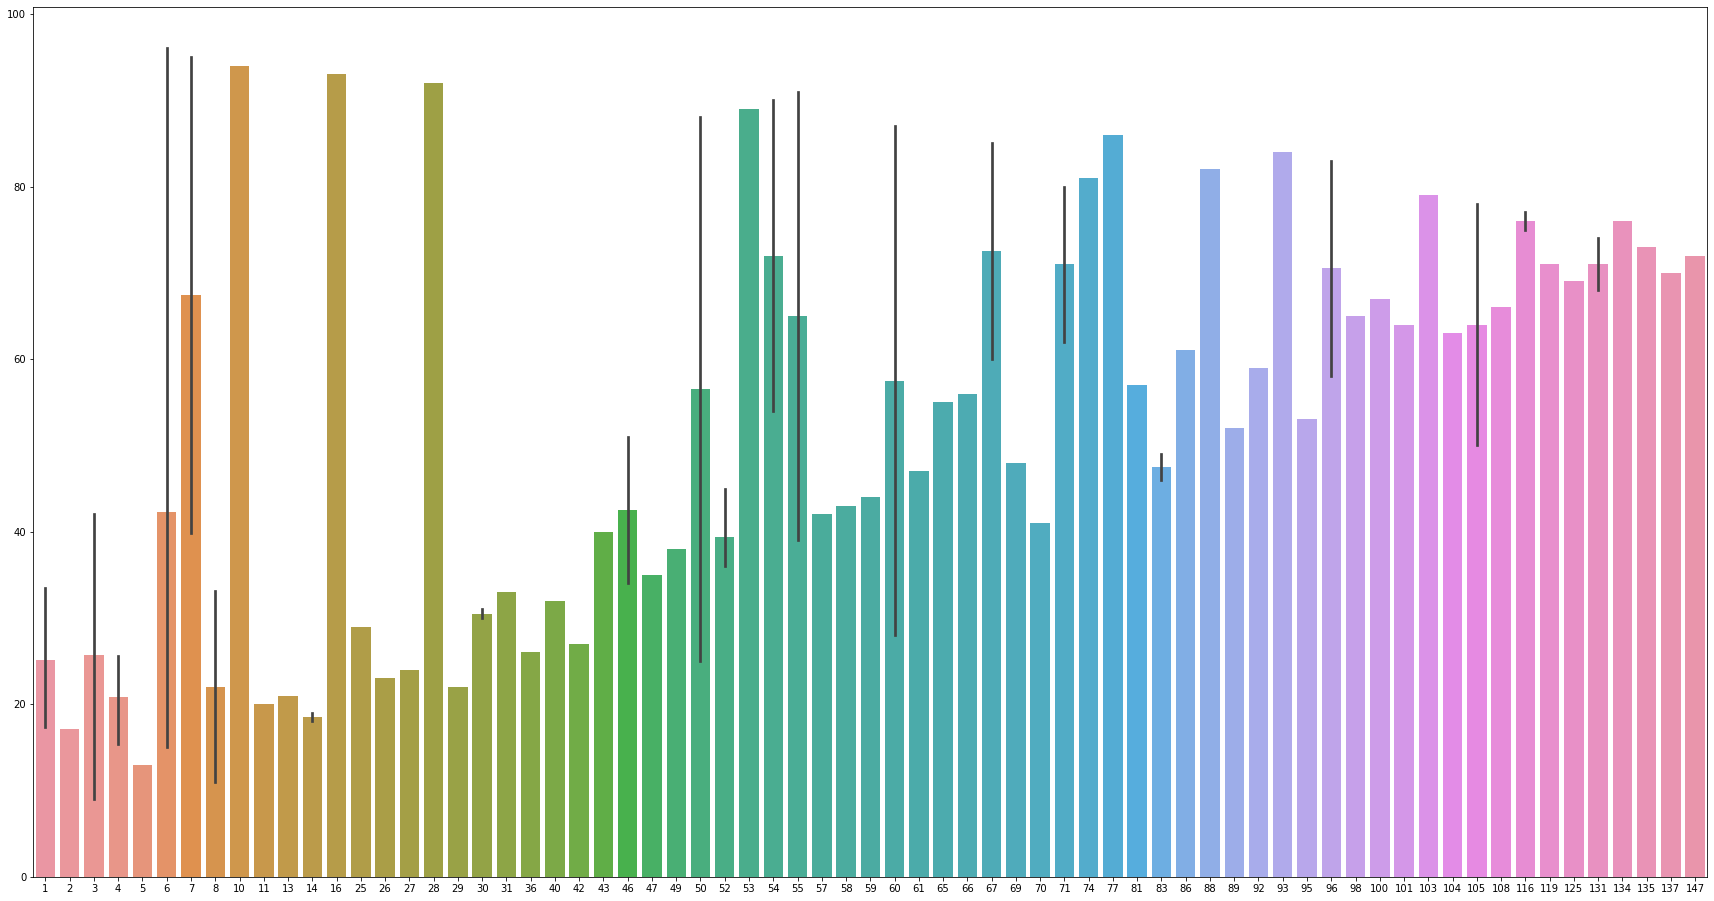

In [201]:
# Accidents per Temperature in F
Temperature = dat['Temperature(F)'].value_counts()
print(Temperature)
plt.figure(figsize=(30, 16))
sns.barplot(Temperature.values, Temperature.index)

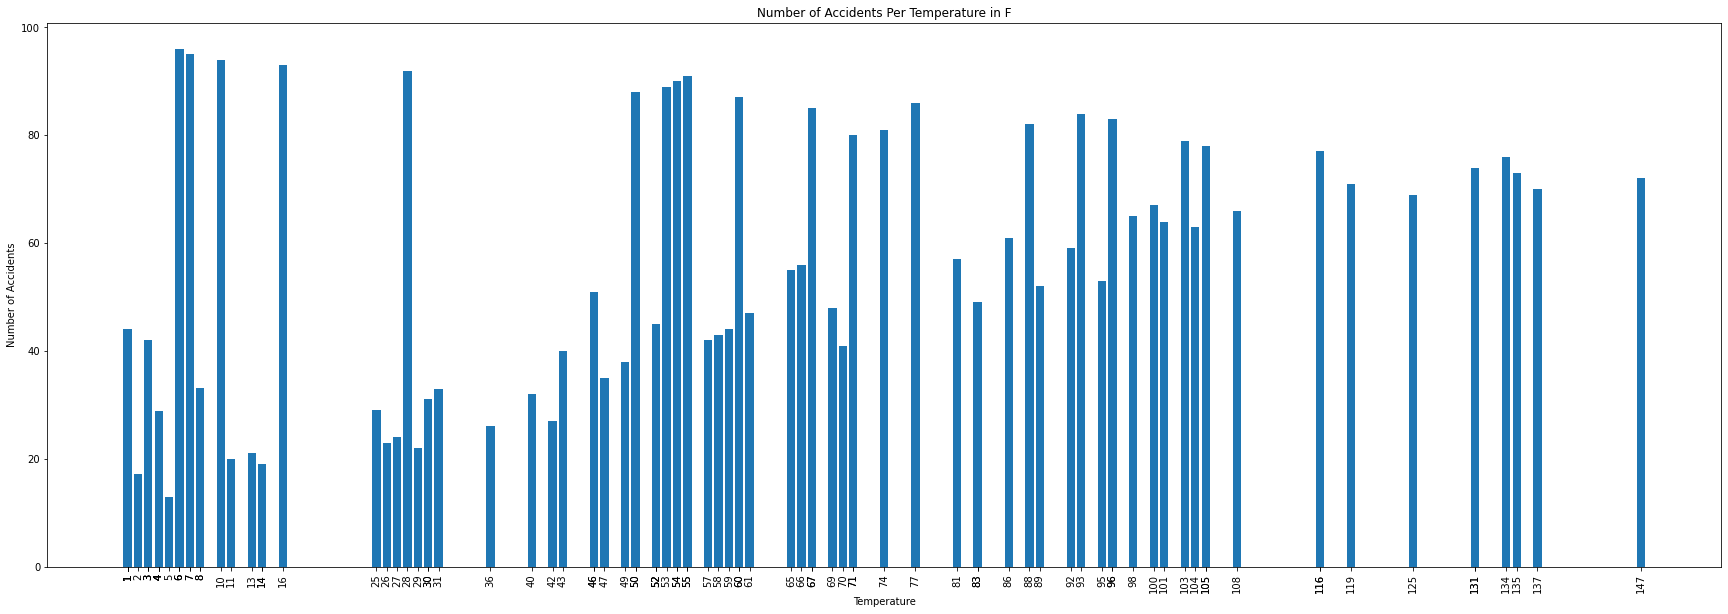

In [213]:
plt.figure(figsize=(30, 10))
plt.title('Number of Accidents Per Temperature in F')
plt.bar(Temperature.values, Temperature.index)
plt.xlabel('Temperature')
plt.ylabel('Number of Accidents')
plt.xticks(Temperature.values, rotation='vertical')
plt.show()